# Bar plot of max change during feature trajectory

### Using feature values from all timepoints, find where the greatest change between 2 timepoints is 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_all = pd.read_csv('../Output/Submission-Long/features/Features_Rescaled.csv')
df_all = df_all[df_all['ContourType'] == 'Manual']
# drop min and max
df_all = df_all[~df_all['Feature'].isin(['firstorder_Minimum', 'firstorder_Maximum'])]
df_result = pd.DataFrame()

patIDs = df_all['PatID'].unique()
fts = df_all['Feature'].unique()

df_all = df_all[['PatID', 'Feature', 'Fraction', 'FeatureValue']]
df_all.drop_duplicates(subset=['PatID', 'Feature', 'Fraction'], keep='first', inplace=True)

In [3]:
# loop through all patients and trajectories
# calculate the abs change in feature value from the first fraction to all others

df_frac1_comp = pd.DataFrame()

for patID in patIDs:
    df_pat = df_all[df_all['PatID'] == patID]
    for ft in fts:
        df_ft = df_pat[df_pat['Feature'] == ft]
        df_ft = df_ft.sort_values('Fraction')
        df_ft['AbsChange'] = abs(df_ft['FeatureValue'] - df_ft['FeatureValue'].iloc[0])
        df_frac1_comp = pd.concat([df_frac1_comp, df_ft])

df_frac1_comp = df_frac1_comp[df_frac1_comp['Fraction'] != 1]


df_frac1_comp

,PatID,Feature,Fraction,FeatureValue,AbsChange
105,1642,shape_Elongation,2,0.762799,0.101041
210,1642,shape_Elongation,3,0.806281,0.144523
315,1642,shape_Elongation,4,0.959834,0.298076
420,1642,shape_Elongation,5,0.945347,0.283589
106,1642,shape_Flatness,2,0.797122,0.143634
...,...,...,...,...,...
20998,1303,ngtdm_Contrast,5,0.160499,0.063846
20684,1303,ngtdm_Strength,2,0.397643,0.013361
20789,1303,ngtdm_Strength,3,0.576777,0.165773
20894,1303,ngtdm_Strength,4,0.774718,0.363714


In [4]:
# loop over all features and pats and get the timepoint with the highest abs change
df_max_abs_change = pd.DataFrame()

for patID in patIDs:
    df_pat = df_frac1_comp[df_frac1_comp['PatID'] == patID]
    for ft in fts:
        df_ft = df_pat[df_pat['Feature'] == ft]
        df_ft = df_ft.sort_values('AbsChange', ascending=False)
        # get the row with the highest abs change
        max_change = df_ft.iloc[0]['AbsChange']
        df_max_row = df_ft[df_ft['AbsChange'] == max_change]
        df_max_row.drop_duplicates(subset=['PatID', 'Feature'], keep='first', inplace=True)
        df_max_abs_change = pd.concat([df_max_abs_change, df_max_row])
        

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [5]:
df_max_abs_change

,PatID,Feature,Fraction,FeatureValue,AbsChange
315,1642,shape_Elongation,4,0.959834,0.298076
421,1642,shape_Flatness,5,0.862209,0.208721
107,1642,shape_LeastAxisLength,2,0.845197,0.170443
108,1642,shape_MajorAxisLength,2,0.719979,0.077872
109,1642,shape_Maximum2DDiameterColumn,2,0.764483,0.105237
...,...,...,...,...,...
20995,1303,ngtdm_Busyness,5,0.127754,0.058884
20996,1303,ngtdm_Coarseness,5,0.057957,0.053690
20892,1303,ngtdm_Complexity,4,0.718757,0.316652
20893,1303,ngtdm_Contrast,4,0.084134,0.140211


In [6]:
print(df_max_abs_change.PatID.nunique())
print(df_max_abs_change.Feature.nunique())
print(df_max_abs_change.Fraction.nunique())
print(df_max_abs_change.shape)

20
105
4
(2100, 5)


In [7]:
# find the fraction that appears most often
print(df_max_abs_change['Fraction'].value_counts())

5    644
4    565
2    453
3    438
Name: Fraction, dtype: int64


In [8]:
# loop over all features and pats
# loop over all fractions and get the two fractions with the highest abs change
df_fracAB_comp = pd.DataFrame()
fractions = df_all['Fraction'].unique()

for patID in patIDs:
    df_pat = df_all[df_all['PatID'] == patID]
    for ft in fts:
        df_ft = df_pat[df_pat['Feature'] == ft]
        
        for fracA in fractions:
            fracA_val = df_ft[df_ft['Fraction'] == fracA]['FeatureValue'].values[0]
            
            for fracB in fractions:
                if fracB > fracA:
            
                    fracB_val = df_ft[df_ft['Fraction'] == fracB]['FeatureValue'].values[0]

                    abs_change = abs(fracA_val - fracB_val)

                    df_row = pd.DataFrame({'PatID': patID, 'Feature': ft, 'Fractions': f'{fracA}-{fracB}', 'AbsChange': abs_change}, index=[0])
                    df_fracAB_comp = pd.concat([df_fracAB_comp, df_row])

df_fracAB_comp

,PatID,Feature,Fractions,AbsChange
0,1642,shape_Elongation,1-2,0.101041
0,1642,shape_Elongation,1-3,0.144523
0,1642,shape_Elongation,1-4,0.298076
0,1642,shape_Elongation,1-5,0.283589
0,1642,shape_Elongation,2-3,0.043482
...,...,...,...,...
0,1303,ngtdm_Strength,2-4,0.377075
0,1303,ngtdm_Strength,2-5,0.124711
0,1303,ngtdm_Strength,3-4,0.197941
0,1303,ngtdm_Strength,3-5,0.303845


In [9]:
# for each patid and feature, get the fraction pair with the highest abs change
df_max_changeAB = df_fracAB_comp.groupby(['PatID', 'Feature']).apply(lambda x: x[x['AbsChange'] == x['AbsChange'].max()]).reset_index(drop=True)
df_max_changeAB.drop_duplicates(subset=['PatID', 'Feature'], keep='first', inplace=True)

In [10]:
df_max_changeAB['Fractions'].value_counts()

1-5    365
1-4    346
2-5    338
1-3    244
1-2    182
3-5    163
3-4    134
4-5    133
2-4    118
2-3     77
Name: Fractions, dtype: int64

In [15]:

df_bar

,Fractions,Count,fracA,fracB,Model
4,1-2,182,1,2,Longitudinal
3,1-3,244,1,3,Longitudinal
1,1-4,346,1,4,Longitudinal
0,1-5,365,1,5,Delta
9,2-3,77,2,3,Longitudinal
8,2-4,118,2,4,Longitudinal
2,2-5,338,2,5,Longitudinal
6,3-4,134,3,4,Longitudinal
5,3-5,163,3,5,Longitudinal
7,4-5,133,4,5,Longitudinal


In [36]:
custom_colours = ['#0fc71d','#0581d6']
sns.set_palette(sns.color_palette(custom_colours))

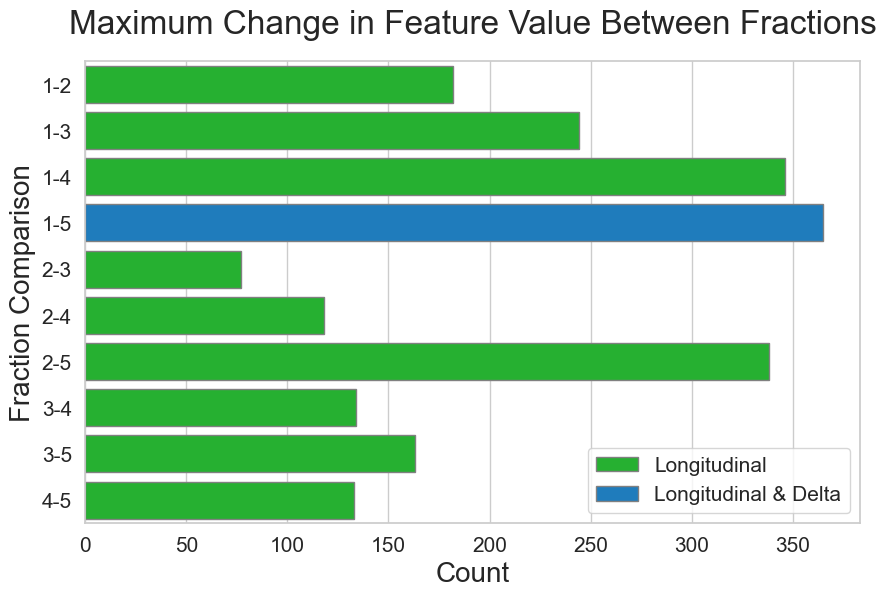

In [37]:
# bar plot of the fraction pairs with the highest abs change
df_bar = df_max_changeAB['Fractions'].value_counts().reset_index()
df_bar.columns = ['Fractions', 'Count']
df_bar['fracA'] = df_bar['Fractions'].apply(lambda x: x.split('-')[0])
df_bar['fracB'] = df_bar['Fractions'].apply(lambda x: x.split('-')[1])

df_bar['Model'] = 'Longitudinal'


df_bar.loc[df_bar['Fractions'] == '1-5', 'Model'] = 'Longitudinal & Delta'

df_bar = df_bar.sort_values(['fracA', 'fracB'], ascending=[True, True])
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
# barplot horizontal
sns.barplot(x='Count', y='Fractions', data=df_bar, hue='Model', palette=custom_colours, dodge=False, edgecolor='grey')

plt.xlabel('Count', fontsize=20)
plt.ylabel('Fraction Comparison', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.title('Maximum Change in Feature Value Between Fractions', fontsize=24, pad=20)
plt.savefig('./bar_max_change_colours.png', dpi=300)
plt.show()